In [ ]:
# All import here
import numpy as np
import matplotlib as mpl
import copy
import seaborn as sns
import random
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs, make_regression
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from tensorflow import keras
from itertools import combinations
from sklearn.metrics import silhouette_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Graded Pratical session

The whole notebook was edited in Google Colab. For reproduction purposes, I advise using Google Colab to test this notebook to prevent any dependency or behavior issues.

## Exercise #1: Supervised Learning

1. Download the dataset

In [ ]:
# 1. Download the dataset
full_dataset = pd.read_csv("Absenteeism_at_work.csv", sep=';')
# I used the .csv file because it's more convenient for me and can be displayed in Colab
# I used ";" as the separator (sep) because it is used in the CSV file
full_dataset

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264.604,...,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264.604,...,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271.219,...,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271.219,...,0,1,2,1,0,2,100,170,35,0


2. Read the data with pandas.

In [ ]:
full_dataset.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271.490235,...,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39.058116,...,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


3. Clean the data by possibly removing rows with unknown values (dropna with pandas).

In [ ]:
full_dataset = full_dataset.dropna()

In [ ]:
full_dataset.head(10)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2
5,3,23,7,6,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
6,10,22,7,6,1,361,52,3,28,239.554,...,0,1,1,1,0,4,80,172,27,8
7,20,23,7,6,1,260,50,11,36,239.554,...,0,1,4,1,0,0,65,168,23,4
8,14,19,7,2,1,155,12,14,34,239.554,...,0,1,2,1,0,0,95,196,25,40
9,1,22,7,2,1,235,11,14,37,239.554,...,0,3,1,0,0,1,88,172,29,8


In [ ]:
# I updated the column types to get more accurate results

column_types = {
    'ID': int,
    'Reason for absence': int,
    'Month of absence': int,
    'Day of the week': int,
    'Seasons': int,
    'Transportation expense': int,
    'Distance from Residence to Work': int,
    'Service time': int,
    'Age': int,
    'Work load Average/day ': float,
    'Hit target': int,
    'Disciplinary failure': int,
    'Education': int,
    'Son': int,
    'Social drinker': int,
    'Social smoker': int,
    'Pet': int,
    'Weight': int,
    'Height': int,
    'Body mass index': int,
    'Absenteeism time in hours': int
}


# Iterate over the dictionary and apply type conversions
for column, dtype in column_types.items():
    full_dataset[column] = full_dataset[column].astype(dtype)
full_dataset = full_dataset.dropna()

In [ ]:
full_dataset.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271.490235,...,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39.058116,...,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [ ]:
full_dataset.head(10)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2
5,3,23,7,6,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
6,10,22,7,6,1,361,52,3,28,239.554,...,0,1,1,1,0,4,80,172,27,8
7,20,23,7,6,1,260,50,11,36,239.554,...,0,1,4,1,0,0,65,168,23,4
8,14,19,7,2,1,155,12,14,34,239.554,...,0,1,2,1,0,0,95,196,25,40
9,1,22,7,2,1,235,11,14,37,239.554,...,0,3,1,0,0,1,88,172,29,8


4. Visualize the data with the most adapted techniques to have a glance about the correlation of
some pairs of attributes.

In [ ]:
#  Preprocess the data : doing PCA with sklearn PCA
# I do this to get mor accurate and faster result with Linear regression and DNN
features = full_dataset[['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons',
                'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age',
                'Work load Average/day ', 'Hit target', 'Disciplinary failure', 'Education', 'Son',
                'Social drinker', 'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

n_components = 2  # the number of components
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(scaled_features)

# DataFrame for Principal Components
principal_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(n_components)])
final_df = pd.concat([full_dataset[['Absenteeism time in hours']], principal_df], axis=1)
final_df

,Absenteeism time in hours,PC1,PC2
0,4,0.801766,0.935351
1,0,3.373907,-0.591941
2,2,2.209307,-0.207246
3,4,-0.580930,0.267368
4,2,0.730846,1.055530
...,...,...,...
735,8,0.799460,1.340075
736,4,-0.331522,-1.459857
737,0,1.187861,0.437296
738,0,1.979225,0.850205


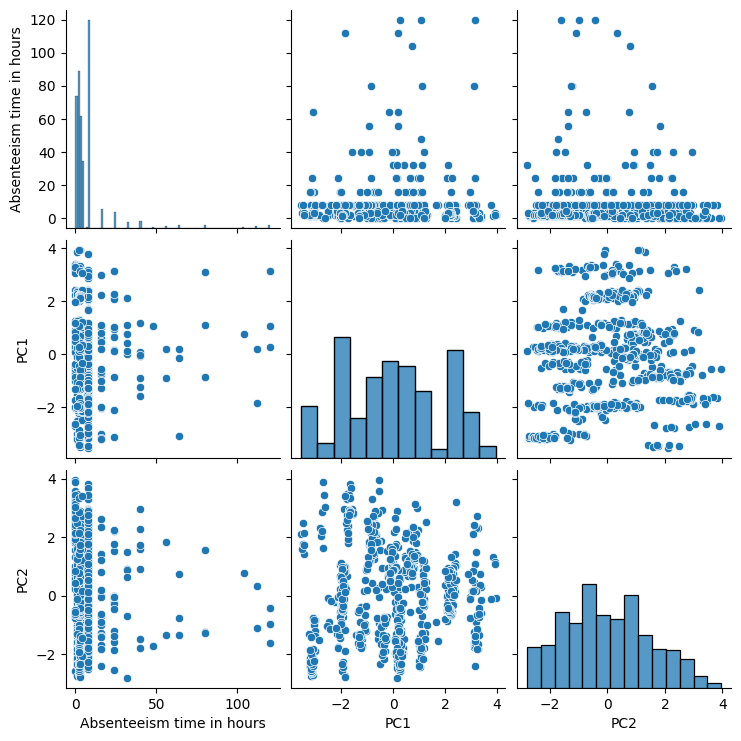

In [ ]:
# Create a scatter matrix
sns.pairplot(final_df)
plt.show()

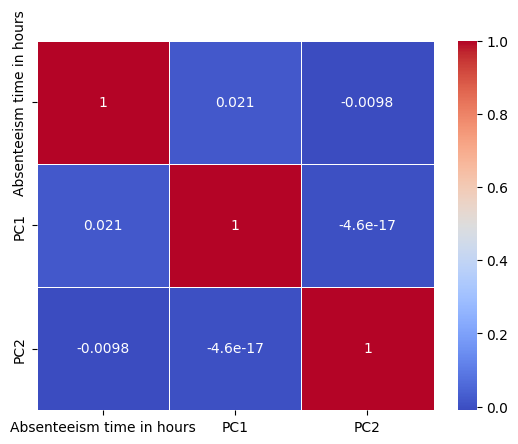

In [ ]:
# Create a heatmap of the correlation matrix
correlation_matrix = final_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5)
plt.show()

5. Divide the data into a training set and a test set (80% training, 20% test).

In [ ]:
target_column = 'Absenteeism time in hours'

# Separate features (X) and target variable (y)
X = full_dataset.drop(target_column, axis=1)
y = full_dataset[target_column]

# Split the data into a training set (80%) and a test set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and test sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (592, 20)
X_test shape: (148, 20)
y_train shape: (592,)
y_test shape: (148,)


6. Normalize the data (preprocessing by normalization).

In [ ]:
# Create a MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the scaler on the training data
X_train_normalized = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_normalized = scaler.transform(X_test)

# Display the first few rows of the normalized training data
print("Normalized X_train:")
print(pd.DataFrame(X_train_normalized, columns=X_train.columns).head())

# Display the first few rows of the normalized test data
print("\nNormalized X_test:")
print(pd.DataFrame(X_test_normalized, columns=X_test.columns).head())

Normalized X_train:
         ID  Reason for absence  Month of absence  Day of the week   Seasons  \
0  0.485714            0.035714          0.583333             0.25  0.000000   
1  0.285714            0.000000          0.916667             0.50  1.000000   
2  0.342857            0.357143          0.833333             0.75  1.000000   
3  0.400000            1.000000          0.666667             0.75  0.000000   
4  0.771429            0.821429          0.083333             0.25  0.333333   

   Transportation expense  Distance from Residence to Work  Service time  \
0                0.785185                         0.234043      0.107143   
1                0.633333                         0.659574      0.428571   
2                0.929630                         0.255319      0.392857   
3                0.640741                         0.553191      0.392857   
4                0.396296                         0.446809      0.285714   

        Age  Work load Average/day   Hit t

7. Train a linear regression model first, then train a Deep Neuron Network with two dense
layers with RELU activation functions.
For the neuron network, use the optimizer Adam

In [ ]:
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train_normalized, y_train)

y_pred_lr = linear_reg_model.predict(X_test_normalized)

lr_mae = mean_absolute_error(y_test, y_pred_lr)
lr_mse = mean_squared_error(y_test, y_pred_lr)
print(f"DNN MAE: {lr_mae}")
print(f"DNN MSE: {lr_mse}")

DNN MAE: 5.643028982511573
DNN MSE: 110.08004444565474


In [ ]:
# Deep Neural Network Model
def build_dnn_model(input_dim):
    model = Sequential([
        Dense(64, activation='relu', input_dim=input_dim),
        Dense(32, activation='relu'),
        Dense(1)  # Output layer with linear activation for regression
    ])
    # model.compile(optimizer=Adam(), loss='mean_squared_error')
    model.compile(optimizer=Adam(), loss='mean_absolute_error')
    return model

# Build and train the DNN model
dnn_model = build_dnn_model(X_train.shape[1])

dnn_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

# Evaluate the DNN model
dnn_predictions = dnn_model.predict(X_test).flatten()

dnn_mae = mean_absolute_error(y_test, dnn_predictions)
dnn_mse = mean_squared_error(y_test, dnn_predictions)
print(f"DNN MAE: {dnn_mae}")
print(f"DNN MSE: {dnn_mse}")


5/5 [==============================] - 0s 3ms/step
DNN MAE: 4.344620337357393
DNN MSE: 97.59601627019703


In [ ]:
# Deep Neural Network Model
def build_dnn_model(input_dim):
    model = Sequential([
        Dense(64, activation='relu', input_dim=input_dim),
        Dense(32, activation='relu'),
        Dense(1)  # Output layer with linear activation for regression
    ])
    model.compile(optimizer=Adam(), loss='mean_squared_error')
    # model.compile(optimizer=Adam(), loss='mean_absolute_error')
    return model

# Build and train the DNN model
dnn_model = build_dnn_model(X_train.shape[1])

dnn_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

# Evaluate the DNN model
dnn_predictions = dnn_model.predict(X_test).flatten()

dnn_mae = mean_absolute_error(y_test, dnn_predictions)
dnn_mse = mean_squared_error(y_test, dnn_predictions)
print(f"DNN MAE: {dnn_mae}")
print(f"DNN MSE: {dnn_mse}")

5/5 [==============================] - 0s 8ms/step
DNN MAE: 6.813915249463674
DNN MSE: 121.98373538611436


8. Compare the results of the different models (linear regression and MLP) on the test set.

A DNN with mean_absolute_error loss has the best results.

In the middle is linear regression.

A DNN with mean_squared_error has the worst results.

#Exercise #2 : Unsupervised Learning

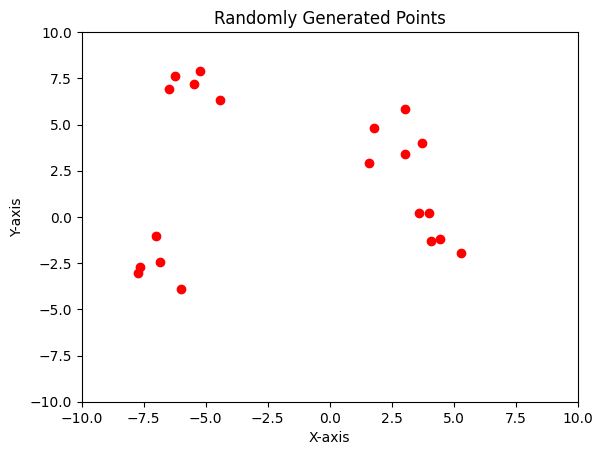

In [ ]:
# Set a seed for reproducibility
np.random.seed(42)

# Generate 20 random points within the interval [-10, 10]
# Define means for different sets of points
means = [(-7.5, -2.5), (-6.0, 7.5), (3.5, 4.0), (5.0, 0.0)]

# Generate 20 random points within the interval [-10, 10]
num_points_per_set = 5
x_values = np.concatenate([np.random.normal(loc=mean[0], size=num_points_per_set) for mean in means])
y_values = np.concatenate([np.random.normal(loc=mean[1], size=num_points_per_set) for mean in means])


# Display the generated points
plt.scatter(x_values, y_values, color='red')
plt.title('Randomly Generated Points')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.xticks(np.arange(-10, 11, 2.5))
plt.yticks(np.arange(-10, 11, 2.5))
plt.grid(False)
plt.show()


In [ ]:
data = np.column_stack((x_values, y_values))

For 2 clusters, silhouette score: 0.5536927566223933
For 3 clusters, silhouette score: 0.734001473700299
For 4 clusters, silhouette score: 0.7524904179314718
For 5 clusters, silhouette score: 0.7011689142995577
For 6 clusters, silhouette score: 0.5301499619289649


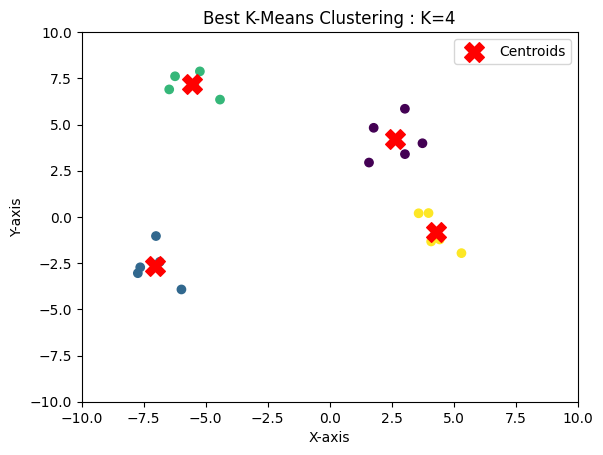

In [ ]:
# Using KMEANS
min_clusters = 2
max_clusters = 6

best_score = -1
best_kmeans = None

for n_clusters in range(min_clusters, max_clusters + 1):
    kmeans_model = KMeans(n_clusters=n_clusters, n_init=3)
    kmeans_model.fit(data)

    # Evaluate the clustering performance using silhouette score
    silhouette_avg = silhouette_score(data, kmeans_model.labels_)

    # Display the results
    print(f"For {n_clusters} clusters, silhouette score: {silhouette_avg}")

    if silhouette_avg > best_score:
        best_score = silhouette_avg
        best_kmeans = kmeans_model

# Display the best clustering result
plt.scatter(x_values, y_values, c=best_kmeans.labels_)
plt.scatter(best_kmeans.cluster_centers_[:, 0], best_kmeans.cluster_centers_[:, 1], marker='X', s=200, c='red', label='Centroids')
plt.title('Best K-Means Clustering : K={}'.format(best_kmeans.n_clusters))
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.xticks(np.arange(-10, 11, 2.5))
plt.yticks(np.arange(-10, 11, 2.5))
plt.grid(False)
plt.legend()
plt.show()

For 2 clusters, silhouette score: 0.5536927566223933
For 3 clusters, silhouette score: 0.734001473700299
For 4 clusters, silhouette score: 0.7524904179314718
For 5 clusters, silhouette score: 0.6534736713946092
For 6 clusters, silhouette score: 0.6411005191592821


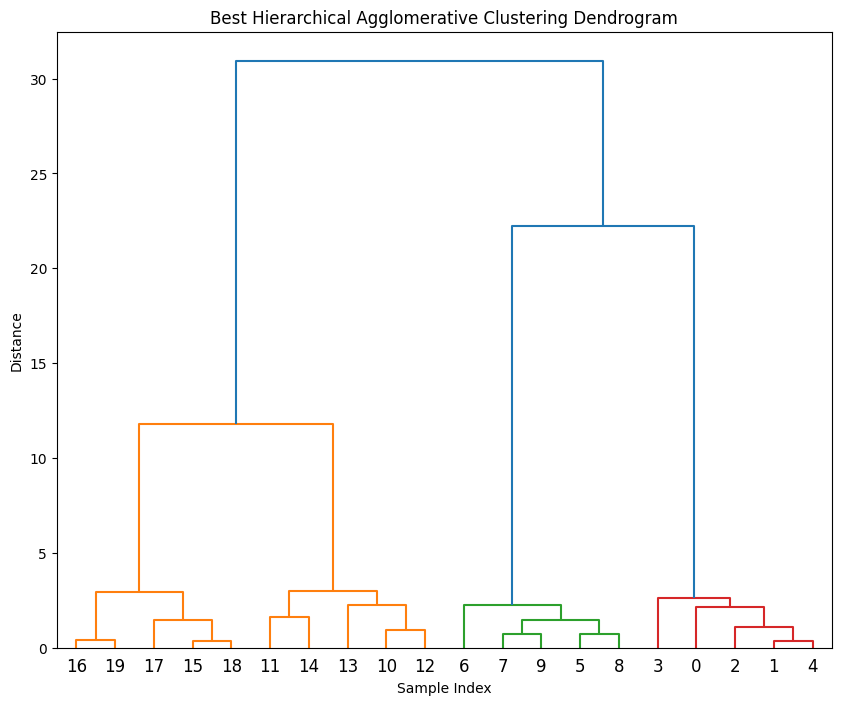

In [ ]:
# Using HAC
min_clusters = 2
max_clusters = 6

best_score = -1
best_hac = None

for n_clusters in range(min_clusters, max_clusters + 1):
    hac_model = AgglomerativeClustering(n_clusters=n_clusters)
    hac_labels = hac_model.fit_predict(data)

    # Evaluate the clustering performance using silhouette score
    silhouette_avg = silhouette_score(data, hac_labels)

    # Display the results
    print(f"For {n_clusters} clusters, silhouette score: {silhouette_avg}")

    if silhouette_avg > best_score:
        best_score = silhouette_avg
        best_hac = hac_model

# Plot dendrogram for the best clustering result
plt.figure(figsize=(10, 8))
dendrogram(linkage(data, method='ward'))
plt.title('Best Hierarchical Agglomerative Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

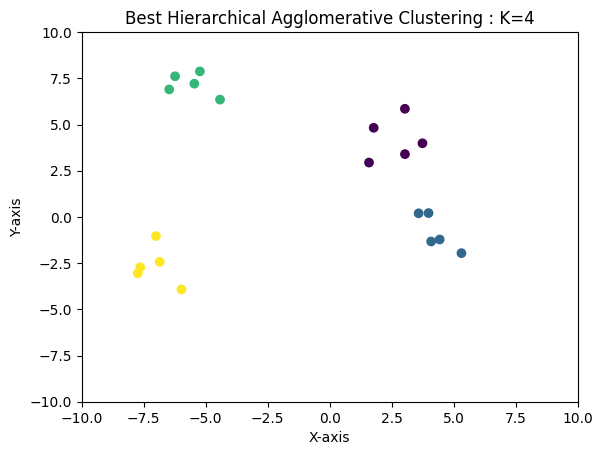

In [ ]:
# Display the best clustering result
plt.scatter(x_values, y_values, c=best_hac.labels_)
plt.title('Best Hierarchical Agglomerative Clustering : K={}'.format(best_hac.n_clusters))
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.xticks(np.arange(-10, 11, 2.5))
plt.yticks(np.arange(-10, 11, 2.5))
plt.grid(False)
plt.show()

Finally compare the results of your algorithms.

Both algorithm find the best n_cluster = 4 with the same  silhouette score =  0.7524904179314718

#Exercise #3: Reinforcement Learning

Description of my MDP

Each state is represented by a sequence of letters 'r', 'g', 'b', 'R', 'G', 'B'.
- 'r' stands for red.
- 'b' stands for blue.
- 'g' stands for green.

For a downward arrow, the letter is in lowercase, and for an upward arrow, the letter is in uppercase.

There are two types of actions: changing the color and changing the orientation.

The agent receives a reward of 100 when it reaches the final state and -1 if it does not find it.



In [ ]:
class MDP:

    def __init__(self, gamma=0.9):
        self.Gamma=gamma
        self.ReachableStates=None  # Only reachable states are taken into account when displaying the action policy

    def setPolicy(self,pi):
        self.Pi=pi


    def displayT(self):
        for s in self.stateSpace():
            for a in self.actionSpace():
                print('{},{}: {}'.format(s,self.actionName(a),self.T(s,a)))


    def displayPi(self):
        print('Pi:')
        if self.ReachableStates is not None:
            for s in self.stateSpace():
                if s[0] in self.ReachableStates:
                    print('{}: {}'.format(s,self.actionNames(self.Pi.bestActions(s))))
        else:
            for s in self.stateSpace():
                print('{}: {}'.format(s,self.actionNames(self.Pi.bestActions(s))))

In [ ]:
class RLTechnique:

    def __init__(self,mdp):
        self.MDP=mdp
        self.Q=dict()
        nba=0
        for s in self.MDP.stateSpace():
            nba=max([nba]+list(self.MDP.actionSpace(s)))
        for s in self.MDP.stateSpace():
            self.Q[s]=np.zeros(nba+1)

#
# Q-Iteration
#
class QIteration(RLTechnique):

    def __init__(self,mdp):
        super().__init__(mdp)

    def run(self,N=-1,precision=1e-13):
        # apply N iterations of Q-Iteration
        # N=-1 means executing until convergence
        l=0
        while(l!=N):
            l+=1
            oldQ=copy.deepcopy(self.Q)

            if hasattr(self.MDP,'terminal'):
                for s in self.MDP.stateSpace():
                    if not self.MDP.terminal(s):
                        for a in self.MDP.actionSpace(s):
                            self.Q[s][a]=self.MDP.R(s,a)+self.MDP.Gamma*np.max(self.Q[self.MDP.T(s,a)])
            else:
                for s in self.MDP.stateSpace():
                    for a in self.MDP.actionSpace(s):
                        self.Q[s][a]=self.MDP.R(s,a)+self.MDP.Gamma*np.max(self.Q[self.MDP.T(s,a)])

            if N!=-1:
                print('Iteration:',l)

                for s in self.MDP.stateSpace():
                    for k,a in enumerate(self.MDP.actionSpace(s)):
                        print(str(round(self.Q[s][a],2)).ljust(7),end='')
                    print('')

            if N==-1 and (abs(np.array(list(oldQ.values()))-np.array(list(self.Q.values())))<precision).all():
                print('QIteration has stopped after',l,'iterations!')
                break

#
# Q-Learning
#
class QLearning(RLTechnique):

    def __init__(self,mdp):
        super().__init__(mdp)


    def bestActions(self,s):
        actions=self.MDP.actionSpace(s)
        if len(actions)>0:
            values=self.Q[s][actions]
            best_actions=np.argwhere(values==np.amax(values)).flatten().tolist()
            return [actions[k] for k in best_actions]
        else:
            return []

    def EpsilonGreedy(self,s,epsilon):
        r=random.random()
        if r<epsilon:
            return random.choice(self.MDP.actionSpace(s))
        else:
            return random.choice(self.bestActions(s))


    def run(self,N=-1,precision=1e-13,epsilon=0.1,alpha=0.9):
        # apply N episodes of Q-Learning
        # N=-1 means executing until convergence
        S=list(self.MDP.stateSpace())

        l=0
        while(l!=N):
            l+=1
            oldQ=copy.deepcopy(self.Q)

            s=random.choice(S)

            while(not self.MDP.terminal(s)):
                a=self.EpsilonGreedy(s,epsilon)
                ns=self.MDP.T(s,a)
                r=self.MDP.R(s,a)
#                print(s,a,'->',ns,' (',r,')',self.Q[s][a])

                newtarget=r+self.MDP.Gamma*np.max(self.Q[ns])
                self.Q[s][a]+=alpha*(newtarget-self.Q[s][a])

                s=ns


            if N!=-1 and N<10:
                print('Episode:',l)

                for s in self.MDP.stateSpace():
                    for k,a in enumerate(self.MDP.actionSpace(s)):
                        print(str(round(self.Q[s][a],2)).ljust(7),end='')
                    print('')

            if N==-1 and (abs(np.array(list(oldQ.values()))-np.array(list(self.Q.values())))<precision).all():
                print('QLearning has stopped after',l,'episodes!')
                break


class Policy:

    def __init__(self,mdp,Q):
        self.MDP=mdp
        self.Q=Q

    def bestActions(self,s):
        actions=self.MDP.actionSpace(s)
        if len(actions)>0:
            values=self.Q[s][actions]
            best_actions=np.argwhere(values==np.amax(values)).flatten().tolist()
            return [actions[k] for k in best_actions]
        else:
            return []


def launch(mdp_class,RL_tec,N=-1,precision=1e-13):
    mdp=mdp_class

    # Application of the RL technique to this MDP
    rl_tec=RL_tec(mdp)
    rl_tec.run(N=N,precision=precision)

    # Compute the policy and display it
    pi=Policy(mdp,rl_tec.Q)
    mdp.setPolicy(pi)
    mdp.displayPi()


In [ ]:
class ColoredArrowsMDP(MDP):

    def __init__(self, initial_state, final_state, gamma=0.9, positive_reward=100):
        self.Gamma = gamma
        self.PR = positive_reward
        self.initial_state = initial_state
        self.goal_state = goal_state
        self.number_arrows = len(initial_state)
        self.buildT()

    def stateSpace(self):
        for combinaison in combinations(['r','g',',b', 'R', 'G', 'B'], self.number_arrows):
            yield combinaison

    def actionSpace(self, state):
        actions = []
        # Swap the orientation of a sequence of two adjacent arrows where one is green and the other is red and both have the same orientation
        for i in range(len(state) - 2):
            if state[i] == 'r' and state[i+1] == 'g' or state[i] == 'R' and state[i+1] == 'G' or state[i] == 'g' and state[i+1] == 'r' or state[i] == 'G' and state[i+1] == 'R' :
                actions.append(('swap_orientation', i))
                actions.append(('swap_orientation', i+1))

        # Swap the orientation of a blue arrow
        for i, arrow in enumerate(state):
            if arrow.lower() == 'b':
                actions.append(('swap_orientation', i))

        # Change the color of green arrow into blue, or a blue into red, or a red into green
        for i, arrow in enumerate(state):
            if arrow.lower() == 'g':
                actions.append(('change_color', i, 'B' if arrow.isupper() else 'b'))
            elif arrow.lower() == 'b':
                actions.append(('change_color', i, 'R' if arrow.isupper() else 'r'))
            elif arrow.lower() == 'r':
                actions.append(('change_color', i, 'G' if arrow.isupper() else 'g'))
        return actions


    def T(self, state, action):
        if action[0] == 'swap_orientation':
            new_state = list(state)
            new_state[action[1]] = state[action[1]].swapcase()
            return new_state
        elif action[0] == 'change_color':
            new_state = list(state)
            new_state[action[1]] = action[2]
            return new_state

    def terminal(self, state):
        return state ==  ('B','G','R','r','b','G')

    def buildA(self):
        a=dict()
        for state in self.stateSpace():
          a[state] = self.actionSpace(state)
        self.A=a

    def buildT(self):
        t=dict()
        for state in self.stateSpace():
          t[state] = self.T(state, self.actionSpace(state))
        self.Ts=t

    def R(self, state):
        if self.terminal(state):
            return 100
        else:
            return -1